# Data Cleaning for JumpSpeeders

Cleaning will be executed on data for a fictitous company, JumpSpeeders, and used for Tableau visualization. This process will include importing the data, renaming items to be more intuitive, finding missing values and outliers then properly handling them, and finally exporting the data into a CSV file.

<blockquote>Comments marked with a verticle bar above/below the colored blocks will explain the purpose or results of the section.</blockquote>

<mark>Tableau visualization URL will be included here when the project is completed.</mark>

<blockquote>Load Python libraries for data cleaning.</blockquote>

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for displaying all of the columns in dataframes, preventing Juptyer from redacting them
pd.set_option('display.max_columns', None)

### Import Data and Display Details

<blockquote>Load the 12 CSV files from the data source into their respective dataframes. Each CSV file represents a month of data.</blockquote>

In [2]:
# load datasets into dataframes
df2022_08 = pd.read_csv('202208-divvy-tripdata.csv')
df2022_09 = pd.read_csv('202209-divvy-publictripdata.csv')
df2022_10 = pd.read_csv('202210-divvy-tripdata.csv')
df2022_11 = pd.read_csv('202211-divvy-tripdata.csv')
df2022_12 = pd.read_csv('202212-divvy-tripdata.csv')

df2023_01 = pd.read_csv('202301-divvy-tripdata.csv')
df2023_02 = pd.read_csv('202302-divvy-tripdata.csv')
df2023_03 = pd.read_csv('202303-divvy-tripdata.csv')
df2023_04 = pd.read_csv('202304-divvy-tripdata.csv')
df2023_05 = pd.read_csv('202305-divvy-tripdata.csv')
df2023_06 = pd.read_csv('202306-divvy-tripdata.csv')
df2023_07 = pd.read_csv('202307-divvy-tripdata.csv')

<blockquote>Store dataframes into an array then check if they all have the same column names.</blockquote>

In [3]:
# store dataframes into one array
dataframes = [df2022_08, df2022_09, df2022_10, df2022_11, df2022_12, df2023_01, df2023_02, df2023_03, df2023_04, df2023_05, df2023_06, df2023_07]

In [4]:
# check if dataframes have the same columns
if all([set(dataframes[0].columns) == set(df.columns) for df in dataframes]):
    print('All have the same columns')
else:
    print('Some have different columns')

All have the same columns


<blockquote>Combine data from the 12 dataframes into 1 dataframe.</blockquote>

In [5]:
# concat dataframes into one dataframe
df = pd.concat(dataframes, axis=0, ignore_index=True)

<blockquote>Display details.</blockquote>

In [6]:
# show info for dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723606 entries, 0 to 5723605
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.7+ MB


<blockquote>Details show that there are 5,723,606 rows of 13 columns.
    
The start latitude/longitude and end latitude/longitude are decimals, which are correct because they are coordinates. The other columns are object (string) type so those are also correct.</blockquote>

<blockquote>Display first 5 rows to see a sample of values.</blockquote>

In [7]:
# show first 5 rows in dataframe
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual


<blockquote>There are missing values in `start_station_name`, `start_station_id`, `end_station_name`, and `end_station_id` so we will need to clean those and check for more.</blockquote>

<blockquote>Before that, let's check the statistical breakdown of each column of the dataframe:

- count (number of times occured)
- unique (how many distinct values)
- top (most frequent occurance)
- freq (number of times more frequent has occured)
- mean (average)
- std (standard deviation)
- min (minimum value)
- 25% (value at the 25% interquartile)
- 50% (value at 50% interquartile, also known as median value)
- 75% (value at 75% interquartile)
- max (maximum value)</blockquote>

In [8]:
# describe dataframe
df.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5723606,5723606,5723606,5723606,4854834,4854702,4798598,4798457,5.723606e+06,5.723606e+06,5.717504e+06,5.717504e+06,5723606
unique,5723606,3,4821003,4833101,1801,1502,1799,1505,NaN,NaN,NaN,NaN,2
top,550CF7EFEAE0C618,electric_bike,2022-10-03 17:22:27,2022-08-22 12:47:49,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,1,3110425,8,20,67214,67214,67820,67820,NaN,NaN,NaN,NaN,3554051
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190296e+01,-8.764758e+01,4.190318e+01,-8.764763e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.540914e-02,2.800641e-02,7.173348e-02,1.192788e-01,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.164000e+01,-8.792000e+01,0.000000e+00,-8.816000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188103e+01,-8.766106e+01,4.188103e+01,-8.766136e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189999e+01,-8.764414e+01,4.190000e+01,-8.764434e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01,NaN


<blockquote>
Statistical analysis cannot be done on Object datatypes. Recall that `ride_id`, `rideable_type`, `started_at`, `ended_at`, `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, and `member_casual` are Object datatypes so there will be no information for mean, std, min, 25%, 50%, 75%, and max.

<br>
<br>
The columns of interest for statistical analysis are:

- start_lat
- start_lng
- end_lat
- end_lng

There are 2 points of interest:

- min for `end_lat` is 0.000000e+00
- max for `end_lng` is 0.000000e+00

Both of those are many standard deviations away from the mean so we will check for outliers for those 2 columns.
</blockquote>

<blockquote>Display number of distinct values since the describe() function wasn't able to show the count for 4 of the columns.</blockquote>

In [9]:
# show number of unique values in each column
df.nunique()

ride_id               5723606
rideable_type               3
started_at            4821003
ended_at              4833101
start_station_name       1801
start_station_id         1502
end_station_name         1799
end_station_id           1505
start_lat              782360
start_lng              740459
end_lat                 13868
end_lng                 13983
member_casual               2
dtype: int64

<blockquote>The column name `member_casual` is not very intuitive so it will be renamed to `rider_membership`.</blockquote>

In [10]:
# rename columns as needed
df = df.rename(columns={'member_casual': 'rider_membership'})

# display all column names after the update
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'rider_membership'],
      dtype='object')

### Handle Missing Values

<blockquote>Find:

- number of rows with missing data
- number of missing data in each column
- rows that have missing data then print them
</blockquote>

In [11]:
# check for missing values
print('Number of rows with missing data: ', df.isna().any(axis=1).sum(), sep='')
print()
print('Number of missing data in each column:')
print(df.isna().sum(axis=0))
print()
print('Row(s) with missing data:')
print(df[df.isna().any(axis=1)])

Number of rows with missing data: 1383239

Number of missing data in each column:
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    868772
start_station_id      868904
end_station_name      925008
end_station_id        925149
start_lat                  0
start_lng                  0
end_lat                 6102
end_lng                 6102
rider_membership           0
dtype: int64

Row(s) with missing data:
                  ride_id  rideable_type           started_at  \
0        550CF7EFEAE0C618  electric_bike  2022-08-07 21:34:15   
1        DAD198F405F9C5F5  electric_bike  2022-08-08 14:39:21   
2        E6F2BC47B65CB7FD  electric_bike  2022-08-08 15:29:50   
3        F597830181C2E13C  electric_bike  2022-08-08 02:43:50   
4        0CE689BB4E313E8D  electric_bike  2022-08-07 20:24:06   
...                   ...            ...                  ...   
5723601  57F5743A5828DA62  electric_bike  2023

<blockquote>There are 1,383,239 rows with missing data.</blockquote>

<blockquote>Since we have coordinates, we can remove the station names and IDs because those could change. It would also take a huge amount of time and effort to manually enter the information. If this was in a work environment then we would consider doing so depending on the deadline, but we don't have that much time for this project.</blockquote>

In [12]:
# remove these columns from the dataframe:
#    `start_station_name`
#    `start_station_id`
#    `end_station_name`
#    `end_station_id`

# drop the columns listed above
df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], axis='columns', inplace=True)

<blockquote>Drop rows with missing `end_lat` and `end_lng` because there is no way of knowing where or how to find those values.</blockquote>

In [13]:
# drop rows with missing `end_lat` and `end_lng` then reindex
df = df.dropna(axis=0).reset_index(drop=True)

<blockquote>Display and confirm that missing values were removed from dataframe.</blockquote>

In [14]:
# check for missing values
print('Number of rows with missing data: ', df.isna().any(axis=1).sum(), sep='')
print()
print('Number of missing data in each column:')
print(df.isna().sum(axis=0))
print()
print('Row(s) with missing data:')
print(df[df.isna().any(axis=1)])

Number of rows with missing data: 0

Number of missing data in each column:
ride_id             0
rideable_type       0
started_at          0
ended_at            0
start_lat           0
start_lng           0
end_lat             0
end_lng             0
rider_membership    0
dtype: int64

Row(s) with missing data:
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_lat, start_lng, end_lat, end_lng, rider_membership]
Index: []


<blockquote>Display final column names and their datatypes.</blockquote>

In [15]:
# show info for dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5717504 entries, 0 to 5717503
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ride_id           object 
 1   rideable_type     object 
 2   started_at        object 
 3   ended_at          object 
 4   start_lat         float64
 5   start_lng         float64
 6   end_lat           float64
 7   end_lng           float64
 8   rider_membership  object 
dtypes: float64(4), object(5)
memory usage: 392.6+ MB


<blockquote>Display statistical data again to see possible outliers to examine.</blockquote>

In [16]:
# describe dataframe
df.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,rider_membership
count,5717504,5717504,5717504,5717504,5.717504e+06,5.717504e+06,5.717504e+06,5.717504e+06,5717504
unique,5717504,3,4816706,4828508,NaN,NaN,NaN,NaN,2
top,550CF7EFEAE0C618,electric_bike,2023-07-13 17:38:08,2022-08-22 12:47:49,NaN,NaN,NaN,NaN,member
freq,1,3110425,8,20,NaN,NaN,NaN,NaN,3553223
mean,NaN,NaN,NaN,NaN,4.190298e+01,-8.764759e+01,4.190318e+01,-8.764763e+01,NaN
std,NaN,NaN,NaN,NaN,4.538713e-02,2.799961e-02,7.173348e-02,1.192788e-01,NaN
min,NaN,NaN,NaN,NaN,4.164000e+01,-8.792000e+01,0.000000e+00,-8.816000e+01,NaN
25%,NaN,NaN,NaN,NaN,4.188103e+01,-8.766107e+01,4.188103e+01,-8.766136e+01,NaN
50%,NaN,NaN,NaN,NaN,4.190000e+01,-8.764414e+01,4.190000e+01,-8.764434e+01,NaN
75%,NaN,NaN,NaN,NaN,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01,NaN


<blockquote>Recall that there are outlier(s) in `end_lat` and `end_lng` with value of 0. 
<br>
<br>
Longitude of 0 degree is the prime meridian and runs vertically through Greenwich, England. 

Latitude of 0 degree is the equator.
<br>
<br>
It's highly likely that the data was entered improperly but let's display boxplots to confirm.</blockquote>

### Examine Outliers

<blockquote>Define functions to graph outlier(s).</blockquote>

In [17]:
# function plot boxplot to check for specific outliers
def outliers_boxplot(data):
    '''
    Accepts as argument dataframe column. 
    Returns a boxplot display of dataframe column.
    '''
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=data)
    plt.title('Boxplot to detect outliers for \'' + data.name + '\'')
    plt.show()

In [18]:
# function plot boxplot to check for specific outliers and display count
def outliers_boxplot_count(data):
    '''
    Accepts as argument dataframe column. 
    Returns a boxplot display of dataframe column.
    '''
    # Set figure and axes
    fig, ax = plt.subplots(1, 2, figsize = (22,5))

    sns.boxplot(x=data, ax=ax[0])
    ax[0].set_title('Boxplot to detect outliers for \'' + data.name + '\'')

    sns.histplot(data=data, ax=ax[1])
    ax[1].set_title('Count for \'' + data.name + '\'')
    plt.show()

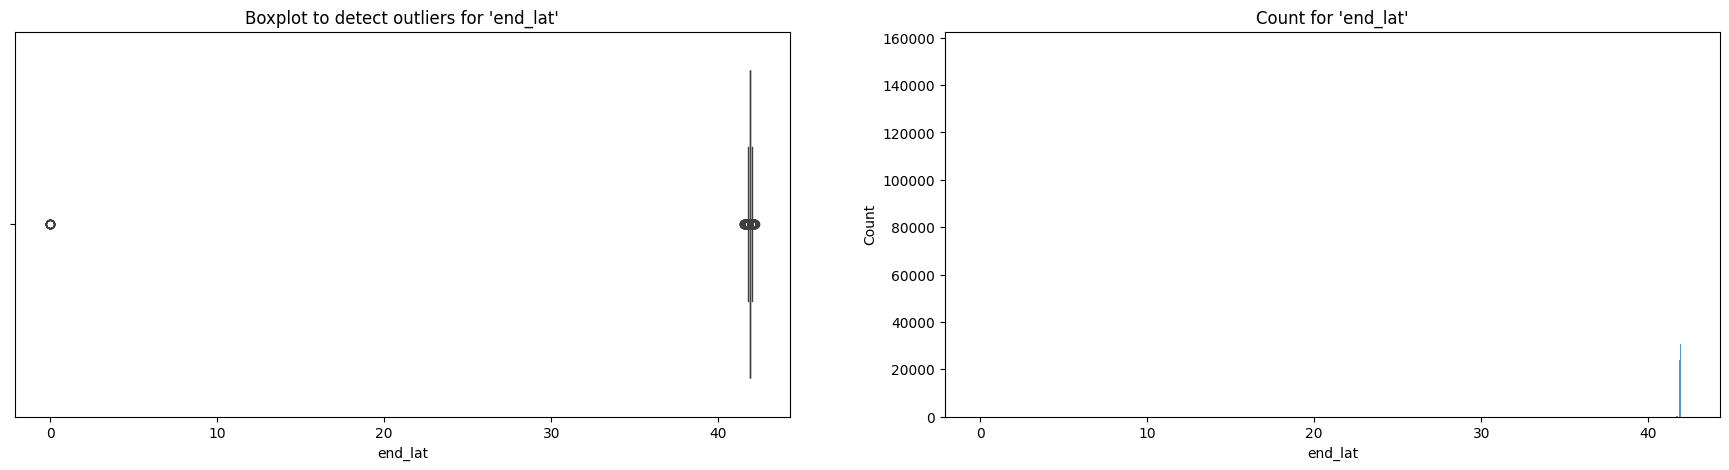

In [19]:
# create a boxplot to visualize distribution of `end_lat` and detect any outliers
outliers_boxplot_count(df['end_lat'])

<blockquote>Shown in the left graph above is an outlier(s) at 0 for `end_lat`.</blockquote>

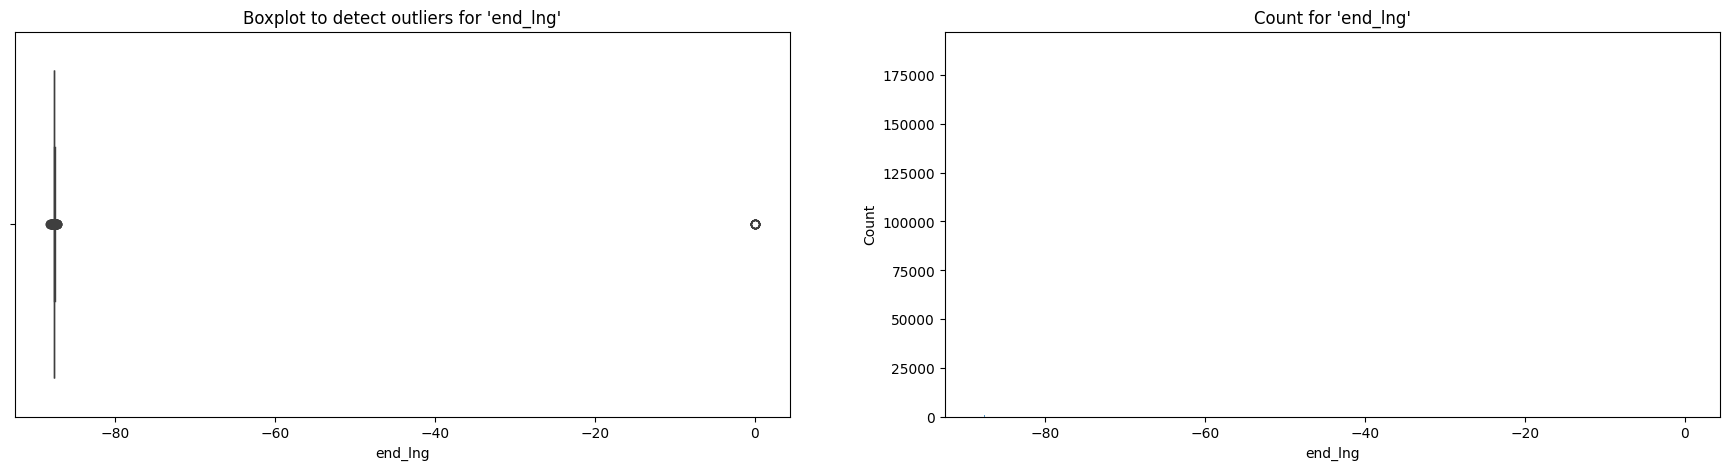

In [20]:
# create a boxplot to visualize distribution of `end_lng` and detect any outliers
outliers_boxplot_count(df['end_lng'])

<blockquote>For `end_lng` shown above in the left graph, there is an outlier(s) at 0.</blockquote>

<blockquote>Display rows that are outliers for `end_lat` or `end_lng`.</blockquote>

In [21]:
# display row if `end_lat` or `end_lng` have value 0
df.loc[(df['end_lat'] == 0) | (df['end_lng'] == 0)]

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,rider_membership
2044963,3B47B333C0D186F0,classic_bike,2022-11-09 13:39:03,2022-11-09 13:44:38,41.879434,-87.635504,0.0,0.0,member
2064583,42AF82C53D831251,electric_bike,2022-11-09 16:17:40,2022-11-09 16:38:06,41.854916,-87.663692,0.0,0.0,casual
2069416,BB8AA29838266294,classic_bike,2022-11-09 11:32:53,2022-11-09 11:37:30,41.879255,-87.639904,0.0,0.0,member
2286728,6AFE1471227BD76F,classic_bike,2022-11-09 16:17:16,2022-11-09 16:26:17,41.871737,-87.651030,0.0,0.0,casual
2287803,E9495F1DC3475D41,classic_bike,2022-11-09 12:21:55,2022-11-09 12:26:18,41.884114,-87.654264,0.0,0.0,member
2288062,75DE33501313D0CE,classic_bike,2022-11-09 15:52:08,2022-11-09 15:52:23,41.881892,-87.648789,0.0,0.0,member
2288244,0A6988FE859F4D54,classic_bike,2022-11-09 10:58:37,2022-11-09 11:06:21,41.878166,-87.631929,0.0,0.0,member
2288315,7F49424E860E7094,classic_bike,2022-11-09 13:27:04,2022-11-09 13:28:28,41.883181,-87.648725,0.0,0.0,member
4711392,873D50153BBC0686,electric_bike,2023-06-15 12:38:05,2023-06-15 12:38:41,41.863166,-87.679811,0.0,0.0,member
4720703,ADFF57D27B5BF9D2,classic_bike,2023-06-15 09:38:07,2023-06-15 09:42:57,41.796642,-87.625923,0.0,0.0,casual


<blockquote>The location for 0 longitude and 0 latitude is known as Null Island, which resides in the Gulf of Guinea off the west African coast.

These are entry errors so they will be dropped from the dataframe.</blockquote>

In [22]:
# remove rows `end_lat` or `end_lng` if value 0
df = df.drop(df[(df['end_lat'] == 0) | (df['end_lng'] == 0)].index).reset_index(drop=True)

<blockquote>Data should be clean now. Let's display the data again to confirm.</blockquote>

### Final Check

In [23]:
# show info for dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5717494 entries, 0 to 5717493
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ride_id           object 
 1   rideable_type     object 
 2   started_at        object 
 3   ended_at          object 
 4   start_lat         float64
 5   start_lng         float64
 6   end_lat           float64
 7   end_lng           float64
 8   rider_membership  object 
dtypes: float64(4), object(5)
memory usage: 392.6+ MB


In [24]:
# describe dataframe
df.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,rider_membership
count,5717494,5717494,5717494,5717494,5.717494e+06,5.717494e+06,5.717494e+06,5.717494e+06,5717494
unique,5717494,3,4816700,4828498,NaN,NaN,NaN,NaN,2
top,550CF7EFEAE0C618,electric_bike,2022-10-24 16:59:45,2022-08-22 12:47:49,NaN,NaN,NaN,NaN,member
freq,1,3110423,8,20,NaN,NaN,NaN,NaN,3553216
mean,NaN,NaN,NaN,NaN,4.190298e+01,-8.764759e+01,4.190326e+01,-8.764779e+01,NaN
std,NaN,NaN,NaN,NaN,4.538714e-02,2.799963e-02,4.554816e-02,2.812988e-02,NaN
min,NaN,NaN,NaN,NaN,4.164000e+01,-8.792000e+01,4.155000e+01,-8.816000e+01,NaN
25%,NaN,NaN,NaN,NaN,4.188103e+01,-8.766107e+01,4.188103e+01,-8.766136e+01,NaN
50%,NaN,NaN,NaN,NaN,4.190000e+01,-8.764414e+01,4.190000e+01,-8.764434e+01,NaN
75%,NaN,NaN,NaN,NaN,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01,NaN


<blockquote>Data looks good so we're going to export the dataframe to a .csv file. We'll also need to check the data types and correct accordingly once data is imported into Tableau.</blockquote>

### Export File

In [25]:
df.to_csv('jumpspeeders.csv', index=False)

<blockquote>Done! 
<br>
File name is `jumpspeeders.csv` and the size is 703,202 KB.

See you in Tableau!</blockquote>

<mark>Tableau visualization URL will be included here when the project is completed.</mark>